# **Linear regression and prediction**

Maintainer: Zhaohu(Jonathan) Fan.Contact him at (psujohnny@gmail.com)

Note: This lab note is still WIP, let us know if you encounter bugs or issues.

## 1 Objective

## 2 Boston Housing Data

 - 2.1 Load Data
 - 2.2 EDA
 - 2.3 Preparation

    - 2.3.1 Splitting data to training and testing samples
    - 2.3.2 (Optional) Standardization

## 3 Model Building

  - 3.1 (Optional) Interaction terms in model

## 4 Diagnostic Plots

## 5 Model Assessment

 - 5.1 In-sample model evaluation (train error)
 - 5.2 Out-of-sample prediction (test error)

#### *Colab Notebook [Open in Colab](https://colab.research.google.com/drive/1Rfq-_M6xnoNXSADGXS3SSaPiWblTVRpQ?usp=sharing)*
#### *Useful information about [ Linear regression and prediction](https://yanyudm.github.io/Data-Mining-R/lecture/3.A_LinearReg.html)*






## 1 Objective

The objective of this case is to get you started with regression model building, variable selection, and model evaluation in Python.

We use Boston Housing Data as an illustrative example in this lab. We learn basic linear regression and analysis with Python. Code in this file is not the only correct way to do things, however it is important for you to understand what each statement does. You will have to modify the code accordingly for your homework.





## 2 Boston Housing Data

Boston housing data is a built-in dataset in sklearn datasets package, so you do not need to download externally.

In [110]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 2.1 Load Data


In [111]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Updating the columns list to match the data
boston = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
boston['MEDV'] = target
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The original data are 506 observations on 14 variables, medv being the response variable y



### 2.2  Exploratory data analysis (EDA)
We have introduced many EDA techniques in lab 2. We will briefly go through some of them here.



In [112]:
boston.shape

(506, 14)

In [113]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [114]:
round(boston.describe(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


We skip the Exploratory Data Analysis (EDA) in this notes, but you should not omit it in your HW and Cases. EDA is very important and always the first analysis to do before any modeling.

### 2.3 Preparation
We have introduced many EDA techniques in lab 2. We will briefly go through some of them here.

#### 2.3.1 Splitting data to training and testing samples
Next we sample 80% of the original data and use it as the training set. The remaining 20% is used as test set. The regression model will be built on the training set and future performance of your model will be evaluated with the test set.

In [115]:
from sklearn.model_selection import train_test_split
from random import sample
import random
random.seed(1234)

In [116]:
#for statmodels smf function (explained in Model Building section)
num = list(range(len(boston)))
ran = sample(num, int(len(num)*0.8))
rem = [i for i in num if i not in ran]

boston_train = boston.iloc[ran, :]
boston_test = boston.iloc[rem, :]

#for sklearn LinearRegression function

X_train = boston_train.iloc[:,:-1]
y_train = boston_train.iloc[:,-1:]

X_test = boston_test.iloc[:,:-1]
y_test = boston_test.iloc[:,-1:]

#### 2.3.2 (Optional) Standardization
If we want our results to be invariant to the units and the parameter estimates $\beta_i$ to be comparible, we can standardize the variables. Essentially we are replacing the original values with their z-score. For this we use StandardScaler function of sklearn

In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(boston)
round(pd.DataFrame(scaler.transform(boston), columns = boston.columns),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.42,0.28,-1.29,-0.27,-0.14,0.41,-0.12,0.14,-0.98,-0.67,-1.46,0.44,-1.08,0.16
1,-0.42,-0.49,-0.59,-0.27,-0.74,0.19,0.37,0.56,-0.87,-0.99,-0.30,0.44,-0.49,-0.10
2,-0.42,-0.49,-0.59,-0.27,-0.74,1.28,-0.27,0.56,-0.87,-0.99,-0.30,0.40,-1.21,1.32
3,-0.42,-0.49,-1.31,-0.27,-0.84,1.02,-0.81,1.08,-0.75,-1.11,0.11,0.42,-1.36,1.18
4,-0.41,-0.49,-1.31,-0.27,-0.84,1.23,-0.51,1.08,-0.75,-1.11,0.11,0.44,-1.03,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.41,-0.49,0.12,-0.27,0.16,0.44,0.02,-0.63,-0.98,-0.80,1.18,0.39,-0.42,-0.01
502,-0.42,-0.49,0.12,-0.27,0.16,-0.23,0.29,-0.72,-0.98,-0.80,1.18,0.44,-0.50,-0.21
503,-0.41,-0.49,0.12,-0.27,0.16,0.98,0.80,-0.77,-0.98,-0.80,1.18,0.44,-0.98,0.15
504,-0.41,-0.49,0.12,-0.27,0.16,0.73,0.74,-0.67,-0.98,-0.80,1.18,0.40,-0.87,-0.06


## 3 Model Building
Your task is to build a best model with training data. You can refer to the sklearn/statsmodels function for more detailed description of linear regression.

The following model includes all x varables in the model


In [118]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model_1 = smf.ols(formula='MEDV ~ CRIM+ZN+INDUS	+CHAS	+NOX+	RM	+AGE+	DIS	+RAD+TAX+	PTRATIO+	B+LSTAT', data = boston_train).fit()

model_1.summary()
# Df Residuals is calculated in the form of ‘n-k-1’ or ‘number of observations-number of predicting variables-1.’

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     83.05
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          1.25e-103
Time:                        14:05:11   Log-Likelihood:                -1208.4
No. Observations:                 404   AIC:                             2445.
Df Residuals:                     390   BIC:                             2501.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.7486      6.009      6.115      0.000      24.934      48.563
CRIM          -0.1166      0.036     -3.283      0.001      -0.186      -0.047
ZN             0.0517      0.016      3.179      0.002       0.020       0.084
INDUS          0.0275      0.072      0.379      0.705      -0.115       0.170
CHAS           2.7030      0.982      2.754      0.006       0.773       4.633
NOX          -17.9559      4.367     -4.112      0.000     -26.542      -9.370
RM             3.7634      0.473      7.962      0.000       2.834       4.693
AGE           -0.0037      0.015     -0.249      0.803      -0.033       0.026
DIS           -1.6741      0.233     -7.174      0.000      -2.133      -1.215
RAD            0.3172      0.077      4.103      0.000       0.165       0.469
TAX           -0.0112      0.004     -2.511      0.012      -0.020      -0.002
PTRATIO       -0.9363      0.153     -6.122      0.000      -1.237      -0.636
B              0.0114      0.003      3.594      0.000       0.005       0.018
LSTAT         -0.5574      0.057     -9.716      0.000      -0.670      -0.445
==============================================================================
Omnibus:                      123.679   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.670
Skew:                           1.329   Prob(JB):                    5.62e-101
Kurtosis:                       7.512   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
 #The standard error of the regression
 round(model_1.scale**.5,2)

4.9

In [120]:
# alternatively, identical to the results above (DF residuals:390)
round(np.sqrt(np.sum(model_1.resid**2)/model_1.df_resid),2)


4.9

But, is this the model you want to use?

### 3.1 (Optional) Interaction terms in model
If you suspect the effect of one predictor x1 on the response y depends on the value of another predictor x2, you can add interaction terms in model. To specify interaction in the model, you put : between two variables with interaction effect. For example

In [121]:
# optional ols
# sigma^2
# model mean
model_2 = smf.ols(formula='MEDV ~ CRIM : ZN - 1', data=boston_train).fit()
#The following way automatically add the main effects of crim and zn
model_2 = smf.ols(formula='MEDV ~ CRIM * ZN - 1', data=boston_train).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.362
Model:                            OLS   Adj. R-squared (uncentered):              0.358
Method:                 Least Squares   F-statistic:                              75.95
Date:                Sat, 25 Jan 2025   Prob (F-statistic):                    6.40e-39
Time:                        14:05:16   Log-Likelihood:                         -1773.3
No. Observations:                 404   AIC:                                      3553.
Df Residuals:                     401   BIC:                                      3565.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.5213      0.099      5.286      0.000       0.327       0.715
ZN             0.3691      0.046      8.019      0.000       0.279       0.460
CRIM:ZN        2.6039      0.463      5.629      0.000       1.695       3.513
==============================================================================
Omnibus:                       19.613   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.262
Skew:                          -0.290   Prob(JB):                     1.34e-08
Kurtosis:                       4.349   Cond. No.                         11.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
 #The standard error of the regression
 round(model_2.scale**.5,2)

19.57

For now we will not investigate the interactions of variables.

## 4 Model Assessment

The diagnostic plots are not as important when regression is used in predictive (supervised) data mining as when it is used in economics. However it is still good to know:

1. What the diagnostic plots should look like when no assumption is violated?

2. If there is something wrong, what assumptions are possibly violated?

3. What implications does it have on the analysis?

4. (How) can I fix it?

Roughly speaking, the table summarizes what you should look for in the following plots

Plot Name  | Good  
------------- | -------------
Residual vs. Fitted  | No pattern, scattered around 0 line
Normal Q-Q | Dots fall on dashed line
Residual vs. Leverage | No observation with large Cook's distance


In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

**Residual Plot**

In [124]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)
pred = base_model.predict(X_train)

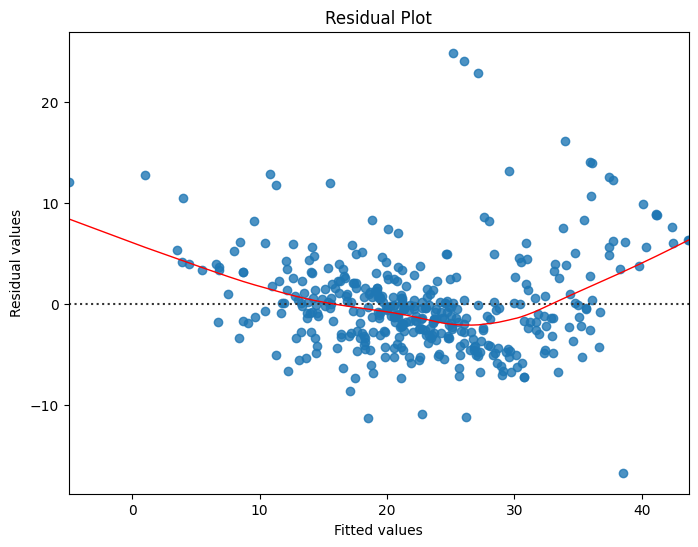

In [125]:
# Flatten the arrays if necessary
pred_flat = pred.flatten()  # Use flatten() to ensure pred is 1-dimensional
medv_flat = y_train['MEDV'].values.flatten()  # Ensure MEDV is also 1-dimensional

# Now create the DataFrame for plotting
plot_data = pd.DataFrame({
    'Fitted Values': pred_flat,
    'MEDV': medv_flat
})

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.residplot(x='Fitted Values', y='MEDV', data=plot_data, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.ylabel("Residual values")
plt.title('Residual Plot')
plt.show()


**QQ Plot**

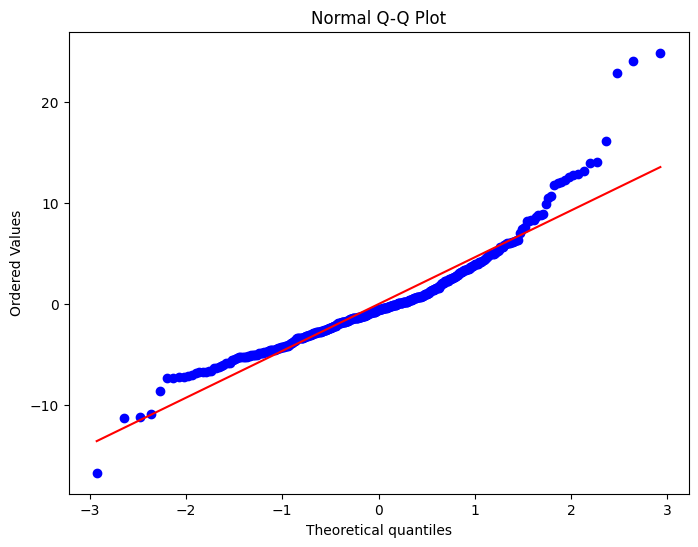

In [126]:
from scipy import stats
residuals = y_train['MEDV'] - pred.reshape(-1)
plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

**Scale-Location plot**

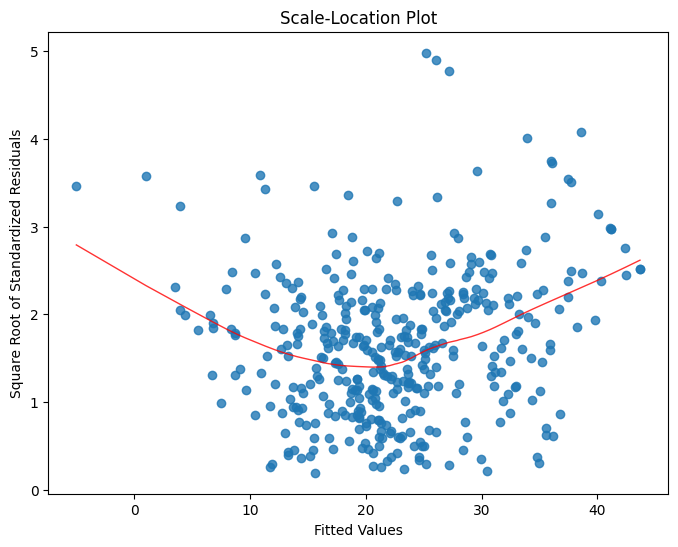

In [127]:
# Scale-Location Plot (Spread-Location Plot)
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(residuals))
plt.figure(figsize=(8,6))
sns.regplot(x=pred, y=model_norm_residuals_abs_sqrt, scatter=True, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Square Root of Standardized Residuals")
plt.xlabel("Fitted Values")
plt.title("Scale-Location Plot")
plt.show()

## 5 Model Assessment


Suppose that everything in model diagnostics is okay. In other words, the model we have built is fairly a valid model. Then we need to evaluate the model performance in terms of different metrics.

Commonly used metrics include **MSE, (adjusted) $R^2$, AIC, BIC** for in-sample performance, and **MSPE** for out-of-sample performance.

### 5.1  In-sample model evaluation (train error)
MSE of the regression, which is the square of 'Residual standard error' in the above summary. It is the sum of squared residuals(SSE) divided by degrees of freedom (n-p-1). In some textbooks the sum of squred residuals(SSE) is called residual sum of squares(RSS). MSE of the regression should be the unbiased estimator for variance of $\epsilon$, the error term in the regression model.


In [128]:
pred = model_1.predict(boston_train)
round(pred,2)

,0
494,21.14
398,6.72
225,40.08
59,20.87
3,28.42
...,...
212,22.76
286,19.40
179,33.21
22,15.55


In [129]:
# average sum squared errors
error = boston_train['MEDV']-pred
AveSquErrors = (error*error).mean()
round(AveSquErrors,2)


23.21

$R^2$ of the model

In [130]:
round(model_1.rsquared,2)

0.73


Adjusted-$R^2$ of the model, if you add a variable (or several in a group), SSE will decrease, $R^2$ will increase, but Adjusted-$R^2$ could go either way.


In [131]:
round(model_1.rsquared_adj,2)

0.73

AIC and BIC of the model, these are information criteria. Smaller values indicate better fit.


In [132]:
round(model_1.aic,2)

2444.87

In [133]:
round(model_1.bic,2)

2500.88


BIC, AIC, and Adjusted $R^2$ have complexity penalty in the definition, thus when comparing across different models they are better indicators on how well the model will perform on future data.


### 5.2 Out-of-sample prediction (test error)
To evaluate how the model performs on future data, we use predict() to get the predicted values from the test set.

In [134]:
# Mean squared prediction error
# PrediValues is a vector that contains predicted values for test set.
PrediValues = model_1.predict(boston_test)
test_error = boston_test['MEDV'] -PrediValues
test_MSPE = (test_error*test_error).mean()
round(test_MSPE,2)

17.66

The most common measure is the Mean Squared Error (MSE): average of the squared differences between the predicted and actual values.


A less popular measure is the Mean Absolute Error (MAE). You can probably guess that here instead of taking the average of squared error, MAE is the average of absolute value of error.

In [135]:
test_MAE = test_error.abs().mean()
round(test_MAE,2)


3.13

In [ ]:
%%shell
jupyter nbconvert --to html ///content/3_A_Linear_regression_and_prediction.ipynb